# CPI Adjustment of Monetary Value

### github library used to download cpi values, even down to the region level
### see: https://github.com/datadesk/cpi

In [110]:
import cpi
import yfinance as yf
import pandas as pd

In [111]:
# update cpi values
cpi.update()

In [112]:
stock_ticker = 'TSLA'

In [113]:
shopify = yf.download(stock_ticker, start="2018-01-02", end="2021-07-19")

[*********************100%***********************]  1 of 1 completed


In [114]:
shopify_close_nom = pd.DataFrame(shopify['Adj Close'])
shopify_close_nom.rename(columns = {'Adj Close': 'Price'}, inplace = True)
shopify_close_nom['nominal/real'] = 'nominal'

In [115]:
shopify_close_nom

,Price,nominal/real
Date,,
2018-01-02,64.106003,nominal
2018-01-03,63.450001,nominal
2018-01-04,62.924000,nominal
2018-01-05,63.316002,nominal
2018-01-08,67.281998,nominal
...,...,...
2021-07-12,685.700012,nominal
2021-07-13,668.539978,nominal
2021-07-14,653.380005,nominal


## Adjust Stock Price Data with CPI

In [116]:
def inflate_price(data, column, ref_year):
    """
    Inflation adjustment on user inputted column
    """
    return pd.DataFrame(data.apply(lambda x: cpi.inflate(x[column], 
                      ref_year), axis=1), columns = ['Price'])

In [117]:
shopify_close_real = inflate_price(shopify, 'Adj Close', 1980)
shopify_close_real['nominal/real'] = 'real'

In [118]:
shopify_close = shopify_close_real.append(shopify_close_nom).reset_index()
shopify_close.rename(columns = {'index':'date'}, inplace = True)

In [119]:
shopify_close

,Date,Price,nominal/real
0,2018-01-02,195.357598,real
1,2018-01-03,193.358487,real
2,2018-01-04,191.755544,real
3,2018-01-05,192.950137,real
4,2018-01-08,205.036172,real
...,...,...,...
1777,2021-07-12,685.700012,nominal
1778,2021-07-13,668.539978,nominal
1779,2021-07-14,653.380005,nominal
1780,2021-07-15,650.599976,nominal


In [120]:
shopify_close = shopify_close.pivot(index = 'Date', columns = 'nominal/real', values = 'Price')

<AxesSubplot:title={'center':'Real and Nominal Values of TSLA'}, xlabel='Date'>

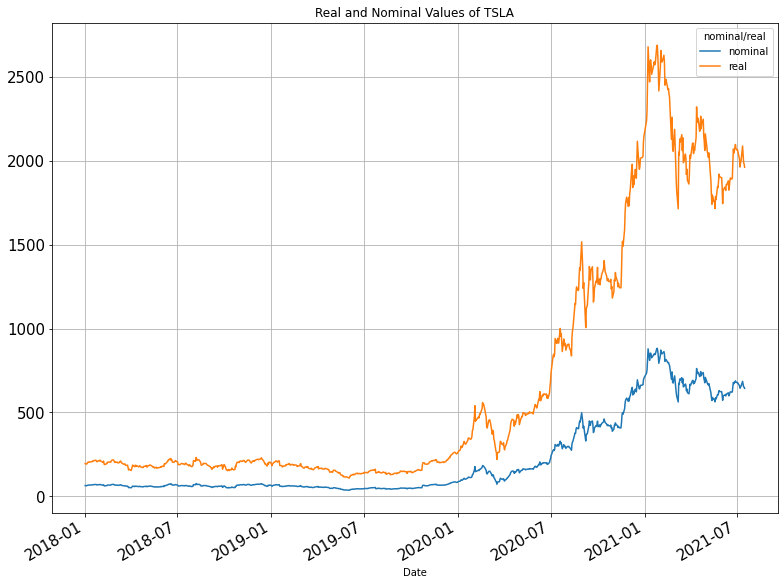

In [121]:
shopify_close.plot(figsize=(13,10), fontsize = 15, title = f"Real and Nominal Values of {stock_ticker}",
                                    grid = True)

## Get CPI Historical Time Series, filter on monthly, and order by date (if one wants to use these as features!!)

In [20]:
cpi_df = cpi.series.get(seasonally_adjusted=True).to_dataframe()
cpi_df = cpi_df[cpi_df['period_type'] == 'monthly']
cpi_df = cpi_df.sort_values('date')

C:\Users\Eddie\anaconda3\envs\securities-analysis\lib\site-packages\cpi\models.py:299: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  return json_normalize(dict_list, sep="_")


In [21]:
cpi_df

,year,date,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
275,1947,1947-01-01,21.480,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M01,M01,JAN,January,1,monthly
276,1947,1947-02-01,21.620,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M02,M02,FEB,February,2,monthly
277,1947,1947-03-01,22.000,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M03,M03,MAR,March,3,monthly
278,1947,1947-04-01,22.000,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M04,M04,APR,April,4,monthly
279,1947,1947-05-01,21.950,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M05,M05,MAY,May,5,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2019,2019-07-01,256.161,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M07,M07,JUL,July,7,monthly
271,2019,2019-08-01,256.300,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M08,M08,AUG,August,8,monthly
272,2019,2019-09-01,256.358,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M09,M09,SEP,September,9,monthly
273,2019,2019-10-01,257.271,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M10,M10,OCT,October,10,monthly
